# Health Insurance Cross Sell Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

## Import Dataset

In [2]:
#Importing dataset
insuranceData = pd.read_csv(r"C:\Users\chial\OneDrive\Desktop\Y1S2\SC1015 DSAI\Project\archive (3)\train.csv")
insuranceData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
insuranceData.shape

(381109, 12)

##### Checking for missing values

In [4]:
insuranceData.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###### There is no missing data. 

## Data Preprocessing

In [5]:
insuranceData['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [6]:
insuranceData['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
insuranceData['Vehicle_Age']=insuranceData['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
insuranceData.Region_Code = insuranceData.Region_Code.astype('int64')
insuranceData.Policy_Sales_Channel = insuranceData.Policy_Sales_Channel.astype('int64')
insuranceData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,3,1,40454.0,26,217,1
1,2,Male,76,1,3,0,2,0,33536.0,26,183,0
2,3,Male,47,1,28,0,3,1,38294.0,26,27,1
3,4,Male,21,1,11,1,1,0,28619.0,152,203,0
4,5,Female,29,1,41,1,1,0,27496.0,152,39,0


## Exploratory Data Analysis

We observe numerical and categorical data from this dataset. Let's split them up respectively.

In [7]:
numerical_insuranceData=['Age','Annual_Premium','Vintage','Region_Code']
categorical_insuranceData=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [8]:
insuranceData[numerical_insuranceData].describe()

,Age,Annual_Premium,Vintage,Region_Code
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397,26.388807
std,15.511611,17213.155057,83.671304,13.229888
min,20.000000,2630.000000,10.000000,0.000000
25%,25.000000,24405.000000,82.000000,15.000000
50%,36.000000,31669.000000,154.000000,28.000000
75%,49.000000,39400.000000,227.000000,35.000000
max,85.000000,540165.000000,299.000000,52.000000


### Univariate Data Analysis

###### Let's check the target variable first: Response

In [9]:
insuranceData.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

C:\Users\chial\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

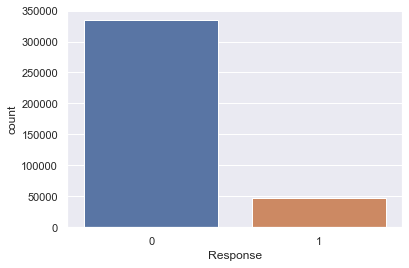

In [54]:
sb.countplot(insuranceData['Response'],x='Response') 

<AxesSubplot:>

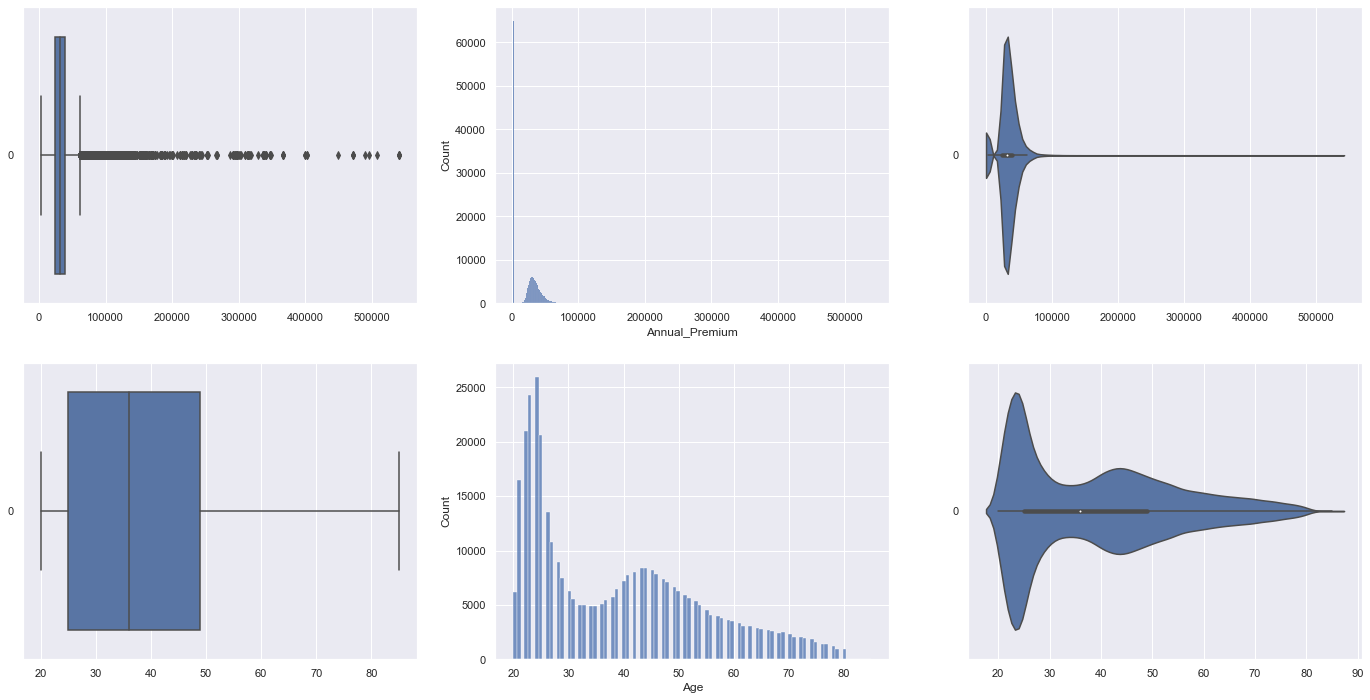

In [11]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for SalePrice
sb.boxplot(data = insuranceData['Annual_Premium'], orient = "h", ax = axes[0,0])
sb.histplot(data = insuranceData['Annual_Premium'], ax = axes[0,1])
sb.violinplot(data = insuranceData['Annual_Premium'], orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for LotArea
sb.boxplot(data = insuranceData['Age'], orient = "h", ax = axes[1,0])
sb.histplot(data = insuranceData['Age'], ax = axes[1,1])
sb.violinplot(data = insuranceData['Age'], orient = "h", ax = axes[1,2])

The variables 'Annual_Premium' and 'Age' seems to be right-skewed. 'Annual_Premium' also has a lot of outliers. 

C:\Users\chial\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chial\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chial\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

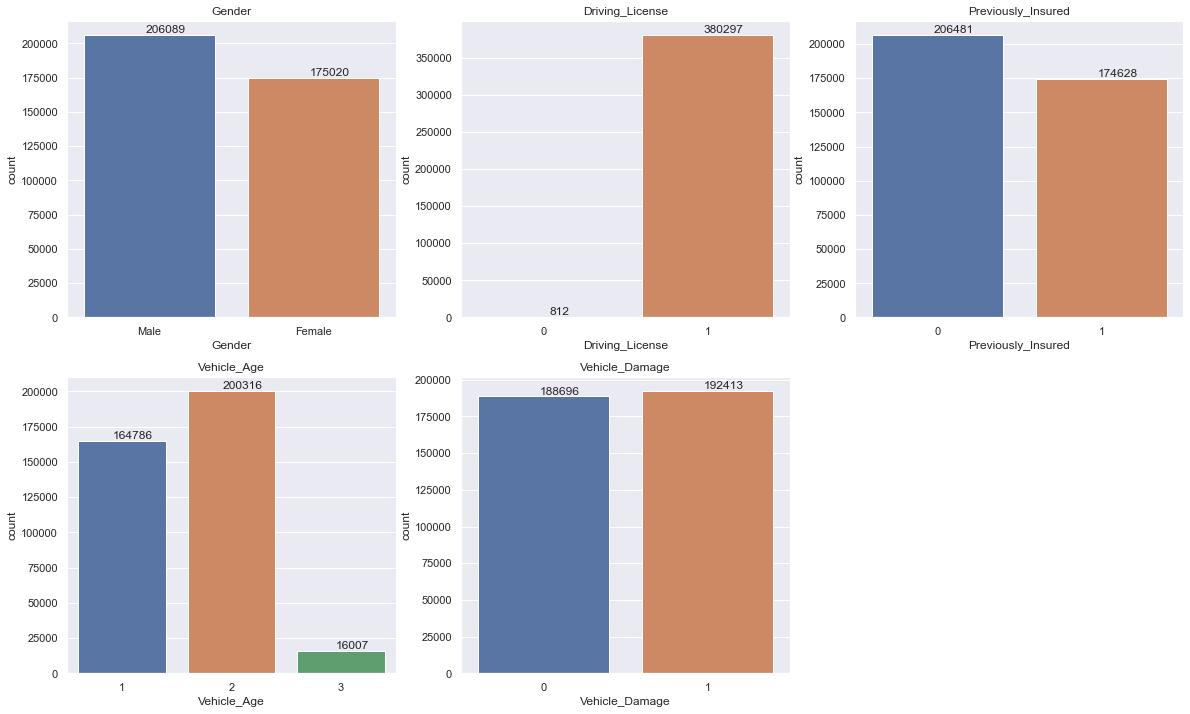

In [56]:
fig=plt.figure(figsize=(20,12))
datas = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
#Plotting Countplot
for data in range(len(datas)):
    ax=fig.add_subplot(2,3,data+1).set_title(datas[data])
    graphs = sb.countplot(insuranceData[datas[data]])
    #Annotations
    for p in graphs.patches:
        graphs.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()), ha='center', va='bottom')

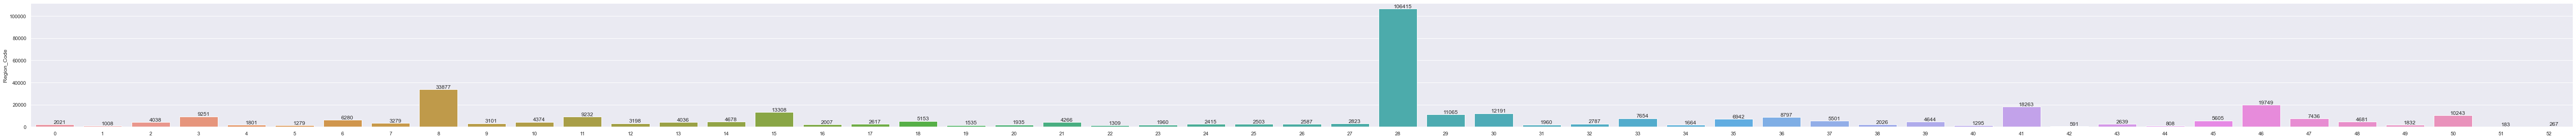

In [13]:
labels= insuranceData['Region_Code'].value_counts().keys()
values= insuranceData['Region_Code'].value_counts()

plt.figure(figsize = (100, 5))
graph = sb.barplot(x = labels, y = values)

for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()), ha='center', va='bottom')

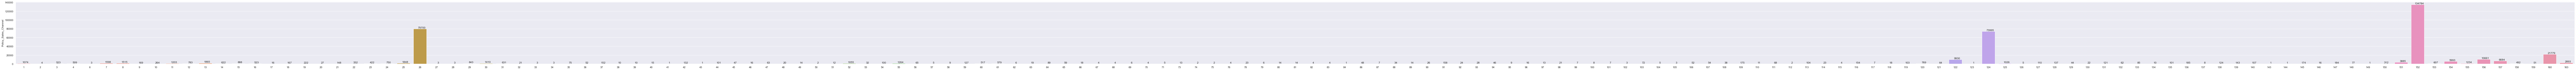

In [14]:
labels= insuranceData['Policy_Sales_Channel'].value_counts().keys()
values= insuranceData['Policy_Sales_Channel'].value_counts()

plt.figure(figsize = (200, 5))
graph = sb.barplot(x = labels, y = values)

for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()),ha='center', va='bottom')

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

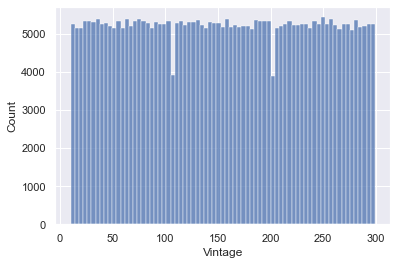

In [15]:
sb.histplot(insuranceData.Vintage)

### Bi/Multi-variate Data Analysis

In [16]:
insuranceData1=insuranceData.drop(['id'], axis = 1)

<AxesSubplot:>

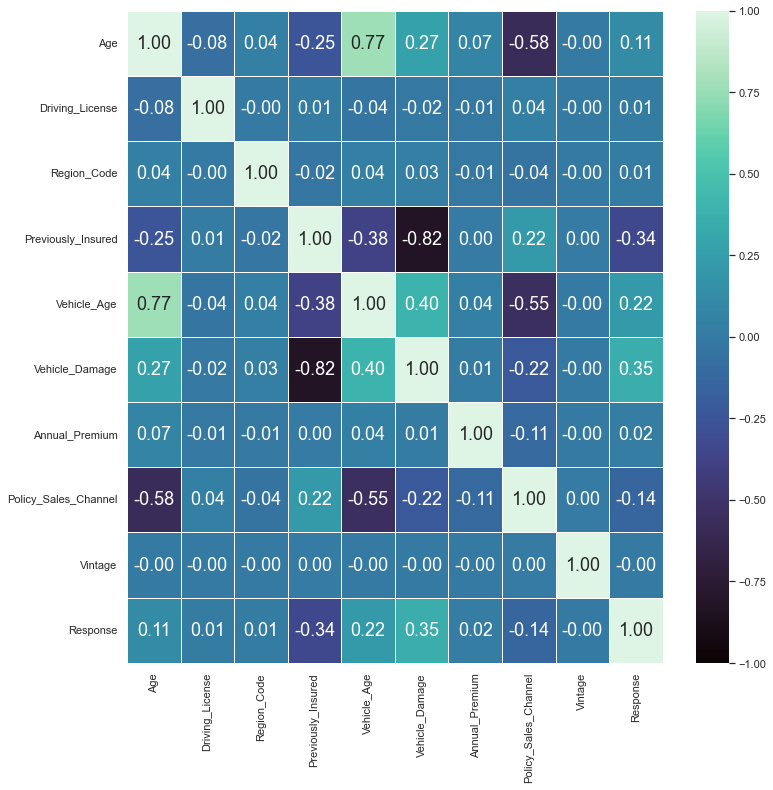

In [17]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(insuranceData1.corr(),vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18},cmap = "mako")

##### Gender & Response

In [18]:
df=insuranceData.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


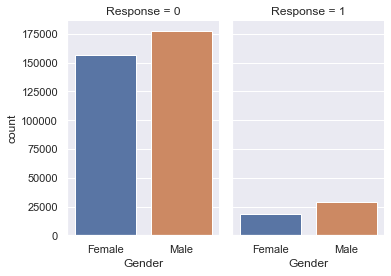

In [19]:
sb.catplot(x="Gender", y="count",col="Response",data=df, kind="bar",height=4, aspect=.7);

##### Age & Annual Premium

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

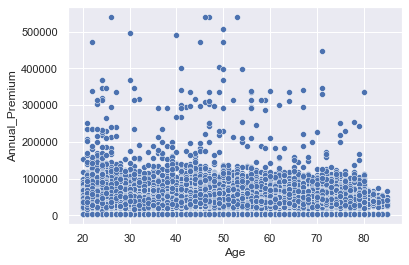

In [20]:
sb.scatterplot(x=insuranceData['Age'],y=insuranceData['Annual_Premium'])

##### Gender & Driving License

In [21]:
df=insuranceData.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


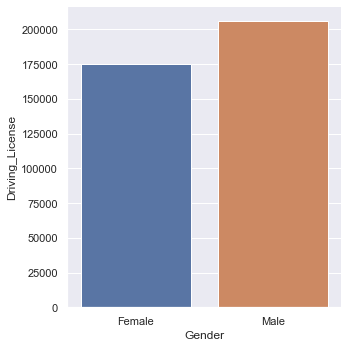

In [22]:
sb.catplot(x="Gender", y="Driving_License",data=df, kind="bar");

##### Vehicle Age & Response

In [23]:
df=insuranceData.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1,0,157584
1,1,1,7202
2,2,0,165510
3,2,1,34806
4,3,0,11305
5,3,1,4702


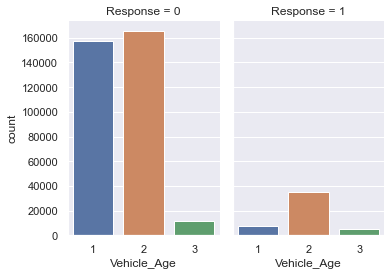

In [24]:
g = sb.catplot(x="Vehicle_Age", y="count",col="Response",data=df, kind="bar",height=4, aspect=.7);

##### Vehicle Damage & Response

In [25]:
df=insuranceData.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,0,0,187714
1,0,1,982
2,1,0,146685
3,1,1,45728


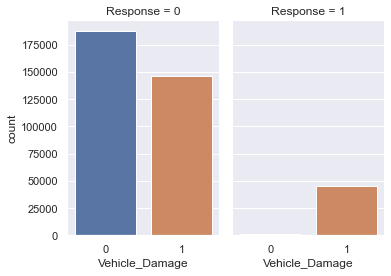

In [26]:
g = sb.catplot(x="Vehicle_Damage", y="count",col="Response",data=df, kind="bar",height=4, aspect=.7);